In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)


In [56]:
df=pd.read_csv('DEI_2020_Indicators.csv',encoding='ISO-8859-1')
df.head()


,Country,Year,Region,adlrt,hdevi,gini,dispi,midle,gnipc,concr,cexpc,rtlpc,ibuy_class,rdply_class,mdply_class,acnt_class,litgap,ibuy_gen,rdply_gen,mdply_gen,acnt_gen,ibuy_rural,rdply_rural,mdply_rural,acnt_rural,ibank,creditc,debitc,acnt,travl,ecom,cpvpc,cptpc,mdply,rdply,wages,bills,remits,mtravl,ecom_mbl,wages_mbl,bills_mbl,gov_mbl,remits_mbl,iusage,iaccess,brdbd,mbl_access,cells,actbb,laptop,pcomp,phone,smart,ictinv,tpcri_abs,tpcri,ictfdi,loans,vntrc,srtupcost,srtup_proc,hifip,scnca,skill,staff,patents,articles,intprop,ictgoods,ictsvc,hitech,hitech_usd,techa,ibus,ftcha,innov,rdexp,researchers,clust,randd,rsrcha,techt,univc,ccorr,corpi,govef,regql,roflw,teror,eandc,orgcm,freei,godi,ctrlcrpt,vanda,comtx,ttppt,gvreg,enfct_cost,minpi,regtime,enfct_time,legal,intpp,crime,egovi,techp,dtri,natstrat,legdb,regauth,regman,regreg,compf,netneut,elecs,elecs_urban,elecs_rural,avgbw,avgmx,servr,ltecv,ntwrk,tgcov,mail,nopostal,trafc,dmlpi,airts,infra,roads,seats,trnts,credi,fsmbn,sound,nopos,atmpc,CountryName
0,ARE,2008,Middle East & North Africa,0.167807,0.362254,0.581507,3.589119,0.161202,2.026084,3.821407,-0.434360,1.030240,-0.073597,0.513758,0.427459,0.302479,0.558314,0.002636,-0.86697,-0.502332,-1.047527,0.714372,3.053711,1.213327,3.135155,1.100425,0.252836,0.194838,-0.20854,-0.519943,-0.692773,-0.592948,0.150762,-1.273390,-1.349645,-1.650750,-1.019572,-1.448936,-0.581566,-0.397113,-0.524518,-0.626908,-0.527024,-0.517714,0.238778,0.387423,-0.562930,0.534496,0.601849,-0.919386,-0.064655,0.690466,0.781592,-1.198889,0.286618,-0.154063,-0.072997,-0.342140,1.622223,1.560124,-3.048490,-0.424336,0.990549,1.183805,0.978006,0.440115,-0.356235,-0.728933,0.173431,-0.419158,0.320228,-0.795218,-0.444902,1.116392,0.352016,1.406033,-0.219728,-0.610374,-0.056838,0.751252,-0.338241,-0.185591,1.358714,-0.649558,1.787247,0.859575,0.459554,0.127896,0.065100,0.751982,1.401393,1.227695,-1.540136,-1.332898,0.738695,-1.139290,1.590582,0.901466,1.635983,0.454521,-0.397089,-0.167955,0.221042,1.550432,0.845063,1.375516,0.115282,1.413189,0.366194,0.445516,1.73813,-0.391171,0.786066,-0.605786,-2.219185,-0.76205,0.957293,0.343383,0.485179,-0.845815,-1.042619,-0.322817,-1.167548,0.50014,0.743799,-2.466808,0.316226,1.29597,1.055041,1.797284,1.296820,1.501312,1.572355,0.658303,-2.263000,1.261139,1.203421,-0.294971,-0.484868,United Arab Emirates
1,ARE,2009,Middle East & North Africa,0.167807,0.347219,0.581507,1.281881,0.128290,1.549488,2.619756,-0.939523,0.504470,-0.073597,0.513758,0.427459,0.302479,0.558314,0.002636,-0.86697,-0.502332,-1.047527,0.714372,3.053711,1.213327,3.135155,1.100425,0.252836,0.194838,-0.20854,-0.519943,-0.688518,-0.415823,0.066137,-0.697015,-0.847289,-0.819761,-0.640983,-1.128045,-0.581566,-0.397113,-0.437444,-0.500949,-0.126301,-0.503689,0.275072,0.387423,-0.594589,0.534496,0.685009,-0.919386,0.132263,0.724571,0.781592,-0.935449,0.953521,-0.169559,-0.128789,-0.502229,1.137553,1.024478,0.359492,-0.130565,1.145718,1.183805,0.978006,0.667253,-0.356235,-0.754653,0.256476,-0.268697,0.642239,-0.793142,-0.439623,1.410020,0.357958,1.406033,-0.219728,-0.610374,-0.056838,0.719875,0.097986,0.568432,1.636862,0.007968,1.787247,0.859575,0.588619,-0.008422,0.044779,0.993614,1.533413,1.600430,-1.540136,-1.332898,0.575305,-1.063500,1.608666,0.901466,1.581730,0.454521,-0.397089,-0.167955,0.221042,1.550432,1.197618,1.772824,0.115282,2.397429,0.366194,0.445516,1.73813,-0.391171,0.786066,-0.324661,-1.362078,-0.76205,0.978603,0.343383,0.485179,-0.752590,-0.956591,-0.322817,-0.307166,0.50014,0.743799,-2.466808,0.316226,1.29597,1.055041,1.828492,1.323094,1.589288,1.689961,0.658303,0.365188,1.261139,0.662417,-0.370089,-0.473159,United Arab Emirates
2,ARE,2010,Middle East & North Africa,0.167807,0.362254,0.581507,1.432567,0.111834,1.388052,2.669152,-1.104161,0.565601,-0.073597,0.513758,0.427459,0.302479,0.558314,0.002636,-0.86697,-0.502332,-1.047527,0.714372,3.053711,1.213327,3.135155,1.100425,0.252836,0.194838,-0.20854,-0.519943,-0.666027,-0.448524,0.134329,-0.208175,-

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Columns: 140 entries, Country to CountryName
dtypes: float64(136), int64(1), object(3)
memory usage: 1.2+ MB


In [58]:
df.isnull().sum().sum()

0

In [59]:
# randomly chosing the target label i.e "Region"
df1=df.copy()
y=df1['Region']
df=df.drop(['Country','Year','Region','CountryName'], axis=1)
X=df.iloc[:,:]


In [73]:
columns_list=df.columns.tolist()
columns_list

['adlrt',
 'hdevi',
 'gini',
 'dispi',
 'midle',
 'gnipc',
 'concr',
 'cexpc',
 'rtlpc',
 'ibuy_class',
 'rdply_class',
 'mdply_class',
 'acnt_class',
 'litgap',
 'ibuy_gen',
 'rdply_gen',
 'mdply_gen',
 'acnt_gen',
 'ibuy_rural',
 'rdply_rural',
 'mdply_rural',
 'acnt_rural',
 'ibank',
 'creditc',
 'debitc',
 'acnt',
 'travl',
 'ecom',
 'cpvpc',
 'cptpc',
 'mdply',
 'rdply',
 'wages',
 'bills',
 'remits',
 'mtravl',
 'ecom_mbl',
 'wages_mbl',
 'bills_mbl',
 'gov_mbl',
 'remits_mbl',
 'iusage',
 'iaccess',
 'brdbd',
 'mbl_access',
 'cells',
 'actbb',
 'laptop',
 'pcomp',
 'phone',
 'smart',
 'ictinv',
 'tpcri_abs',
 'tpcri',
 'ictfdi',
 'loans',
 'vntrc',
 'srtupcost',
 'srtup_proc',
 'hifip',
 'scnca',
 'skill',
 'staff',
 'patents',
 'articles',
 'intprop',
 'ictgoods',
 'ictsvc',
 'hitech',
 'hitech_usd',
 'techa',
 'ibus',
 'ftcha',
 'innov',
 'rdexp',
 'researchers',
 'clust',
 'randd',
 'rsrcha',
 'techt',
 'univc',
 'ccorr',
 'corpi',
 'govef',
 'regql',
 'roflw',
 'teror',
 'ea

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = RandomForestClassifier().fit(X_train,y_train)
importance = clf.feature_importances_
importance=importance.tolist()

features=dict(zip(columns_list, importance))
sorted_features=sorted(features.items(), key=lambda x: x[1],reverse=True)

#Top 10 features
sorted_features=sorted_features[:10]
sorted_features

[('adlrt', 0.04874267122817764),
 ('patents', 0.03866756838178736),
 ('freei', 0.036756640761118904),
 ('concr', 0.03498792597176284),
 ('nopos', 0.031996091556167915),
 ('elecs_rural', 0.0302508705294566),
 ('articles', 0.029391084067441862),
 ('gini', 0.028814841755830826),
 ('elecs_urban', 0.02780458054519186),
 ('ibus', 0.025908028613264827)]

<IPython.core.display.Javascript object>


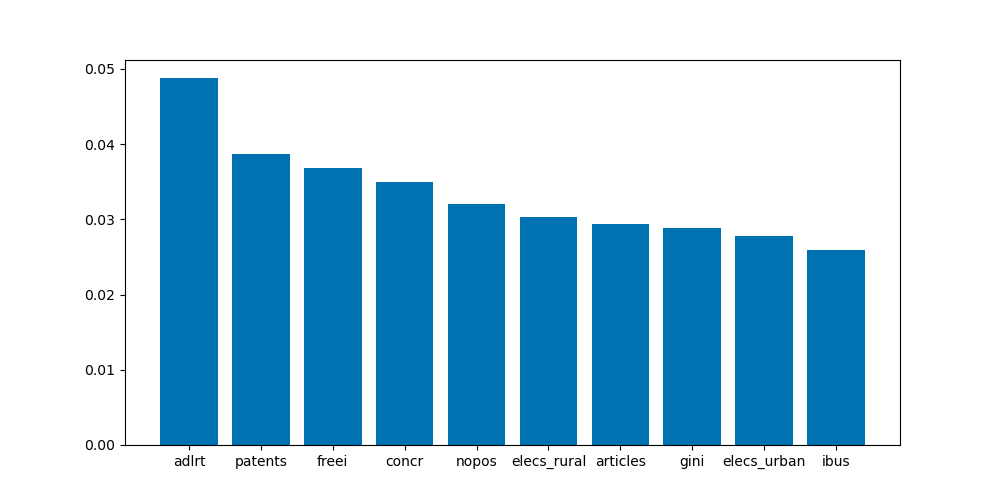

<BarContainer object of 10 artists>

In [112]:
import seaborn as sns

plt.style.use('seaborn-colorblind')
list_names=[]
list_vals=[]

for names,vals in sorted_features:
    list_names.append(names)
    list_vals.append(vals)

plt.figure(figsize=(10,5))
plt.bar(list_names,list_vals)
